In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from IPython.display import Image

### 표준정규분포( Standard Normal Distribution : N(0,1) ) 

**정규분포(Normal Distribution)** 혹은 가우스 정규분포(Gaussian Normal Distribution)라는 분포는 자연 현상에서 나타나는 숫자를 확률 모형으로 모형화할 때 많이 사용한다.

정규분포는 평균 $\mu$와 분산 $\sigma^2$이라는 두 모수만으로 정의되며 확률밀도함수(pdf: Probability Density Function)는 다음과 같은 수식으로 표현된다.

$$
\begin{align}
\mathcal{N}(x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right)
\tag{1}
\end{align}
$$

분산의 역수를 정밀도(precision) $\beta$라고 부르기도 한다.

$$
\begin{align}
\beta = \dfrac{1}{\sigma^2}
\tag{2}
\end{align}
$$

정규분포 중에서도 평균이 0이고 분산이 1인 ($\mu=0$, $\sigma^2=1$) 정규분포를 **표준정규분포(Standard Normal Distribution)**라고 한다.

정규분포의 확률밀도함수는 다음과 같은 성질을 가진다.

* $x=\mu$일 때 확률밀도가 최대가 된다.
* $x=\infty$로 다가가거나 $x=-\infty$로 다가갈수록 확률밀도가 작아진다.

In [5]:
x = np.linspace( -5, 5, 100 )
y = ( 1 /np.sqrt( 2*np.pi ) )*np.exp( -x**2/2)    # N(0,1)

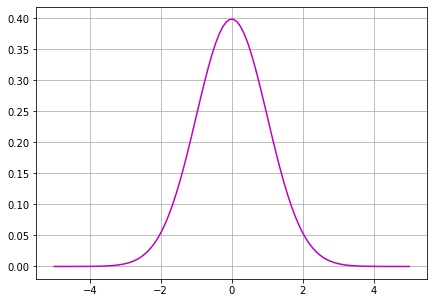

In [139]:
plt.figure( figsize=( 7, 5 ) )
plt.grid()
plt.plot( x, y , color='m' );plt.show()

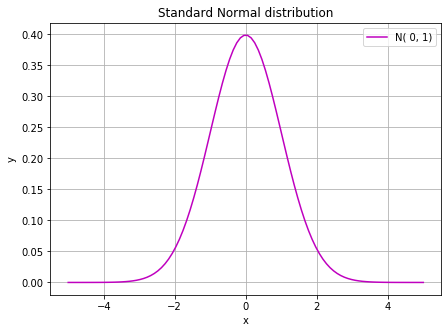

In [42]:
rv = stats.norm( 0, 1 )
x  = np.linspace( -5, 5, 100 )
y1 = rv.pdf( x )
plt.figure( figsize=( 7, 5 ) )
plt.plot( x, y1, color='m' )
plt.title( 'Standard Normal distribution' )
plt.xlabel('x'); plt.ylabel('y')
plt.grid()
plt.legend( [ 'N( 0, 1)'])
plt.show()

In [204]:
rv = stats.norm( 0, 1 )
rv.cdf( 0 )

0.5

In [45]:
rv.cdf( 1 )

0.8413447460685429

In [44]:
rv.ppf( 0.5 )

0.0

In [46]:
rv.ppf( rv.cdf( 1 ) )

1.0

In [47]:
rv.cdf( 1 ) - rv.cdf( 0 )

0.3413447460685429

#### 1. P(  -2 <  X  < 2   ) 확률을 구하시오. X ~ N( 0, 1 )

In [49]:
rv.cdf(2) - rv.cdf(-2)

0.9544997361036416

#### 2. 전교생의 상위 5%의 수학점수를 구하여라.

In [53]:
rv.ppf( 0.95 )

1.6448536269514722

### 표준화(Standardization)

In [58]:
np.random.seed(1)
data = np.random.randint( 30, size=(6,5) )
data 

array([[ 5, 11, 12,  8,  9],
       [11,  5, 15,  0, 16],
       [ 1, 12,  7, 13, 28],
       [ 6, 25, 18, 20,  5],
       [18, 20, 11, 28, 10],
       [28, 29, 14, 18,  4]])

In [62]:
data_std = ( data - np.mean( data, axis=0 ) ) / np.std( data, axis=0 )
data_std

array([[-0.71382613, -0.71543577, -0.24253563, -0.72710089, -0.36834548],
       [-0.0549097 , -1.43087154,  0.63059263, -1.62199429,  0.49112731],
       [-1.15310374, -0.59619648, -1.69774938, -0.16779251,  1.96450922],
       [-0.60400672,  0.95391436,  1.50372088,  0.61523921, -0.85947278],
       [ 0.71382613,  0.35771789, -0.53357838,  1.51013262, -0.24556365],
       [ 1.81202017,  1.43087154,  0.33954988,  0.39151586, -0.98225461]])

In [67]:
stats.zscore( data )

array([[-0.71382613, -0.71543577, -0.24253563, -0.72710089, -0.36834548],
       [-0.0549097 , -1.43087154,  0.63059263, -1.62199429,  0.49112731],
       [-1.15310374, -0.59619648, -1.69774938, -0.16779251,  1.96450922],
       [-0.60400672,  0.95391436,  1.50372088,  0.61523921, -0.85947278],
       [ 0.71382613,  0.35771789, -0.53357838,  1.51013262, -0.24556365],
       [ 1.81202017,  1.43087154,  0.33954988,  0.39151586, -0.98225461]])

In [70]:
StandardScaler().fit_transform( data )

array([[-0.71382613, -0.71543577, -0.24253563, -0.72710089, -0.36834548],
       [-0.0549097 , -1.43087154,  0.63059263, -1.62199429,  0.49112731],
       [-1.15310374, -0.59619648, -1.69774938, -0.16779251,  1.96450922],
       [-0.60400672,  0.95391436,  1.50372088,  0.61523921, -0.85947278],
       [ 0.71382613,  0.35771789, -0.53357838,  1.51013262, -0.24556365],
       [ 1.81202017,  1.43087154,  0.33954988,  0.39151586, -0.98225461]])

#### 3. P(  X > 14  ) 확률을 구하시오. X ~ N( 11, 16 )

In [102]:
rv1 = stats.norm( 11, 4 )
print( f' { round( (1 - rv1.cdf( 14 ) ), 3 )*100 }%' )

 22.7%


#### P( Z > (14-11) / 4 )

In [124]:
print( f'{ round( 1 - rv.cdf( (14-11) / 4 ), 3 )*100 }%' )

22.7%


#### 4. P(  X < 760  ) 확률을 구하시오. X ~ N( 800, 900 )

In [104]:
rv2 = stats.norm( 800, 30 )
print( f' {round( (rv2.cdf( 760 ) ), 3 )*100}%' )

 9.1%


#### P(  Z < (760-800) / 30  ) 

In [138]:
print( f'{ round( rv.cdf( (760-800) / 30 ), 3 )*100 }%' )


9.1%


#### 5. P(  80 <  X  < 90   ) 확률을 구하시오. X ~ N( 70, 64 )

In [115]:
mu    = 70
sigma = math.sqrt( 64 )
rv3   = stats.norm( mu, sigma )
print( f' {round( (rv3.cdf( 90 )- rv3.cdf( 80 )), 3 )*100}%' )

 9.9%


#### P(  (80-70) / 8 <  Z  < (90-70) / 8   ) 

In [133]:
print( f' {round( rv.cdf( (90-mu)/sigma ) - rv.cdf( (80-mu)/sigma ), 3 )*100}%' )

 9.9%


#### Standard Normal Dist Table

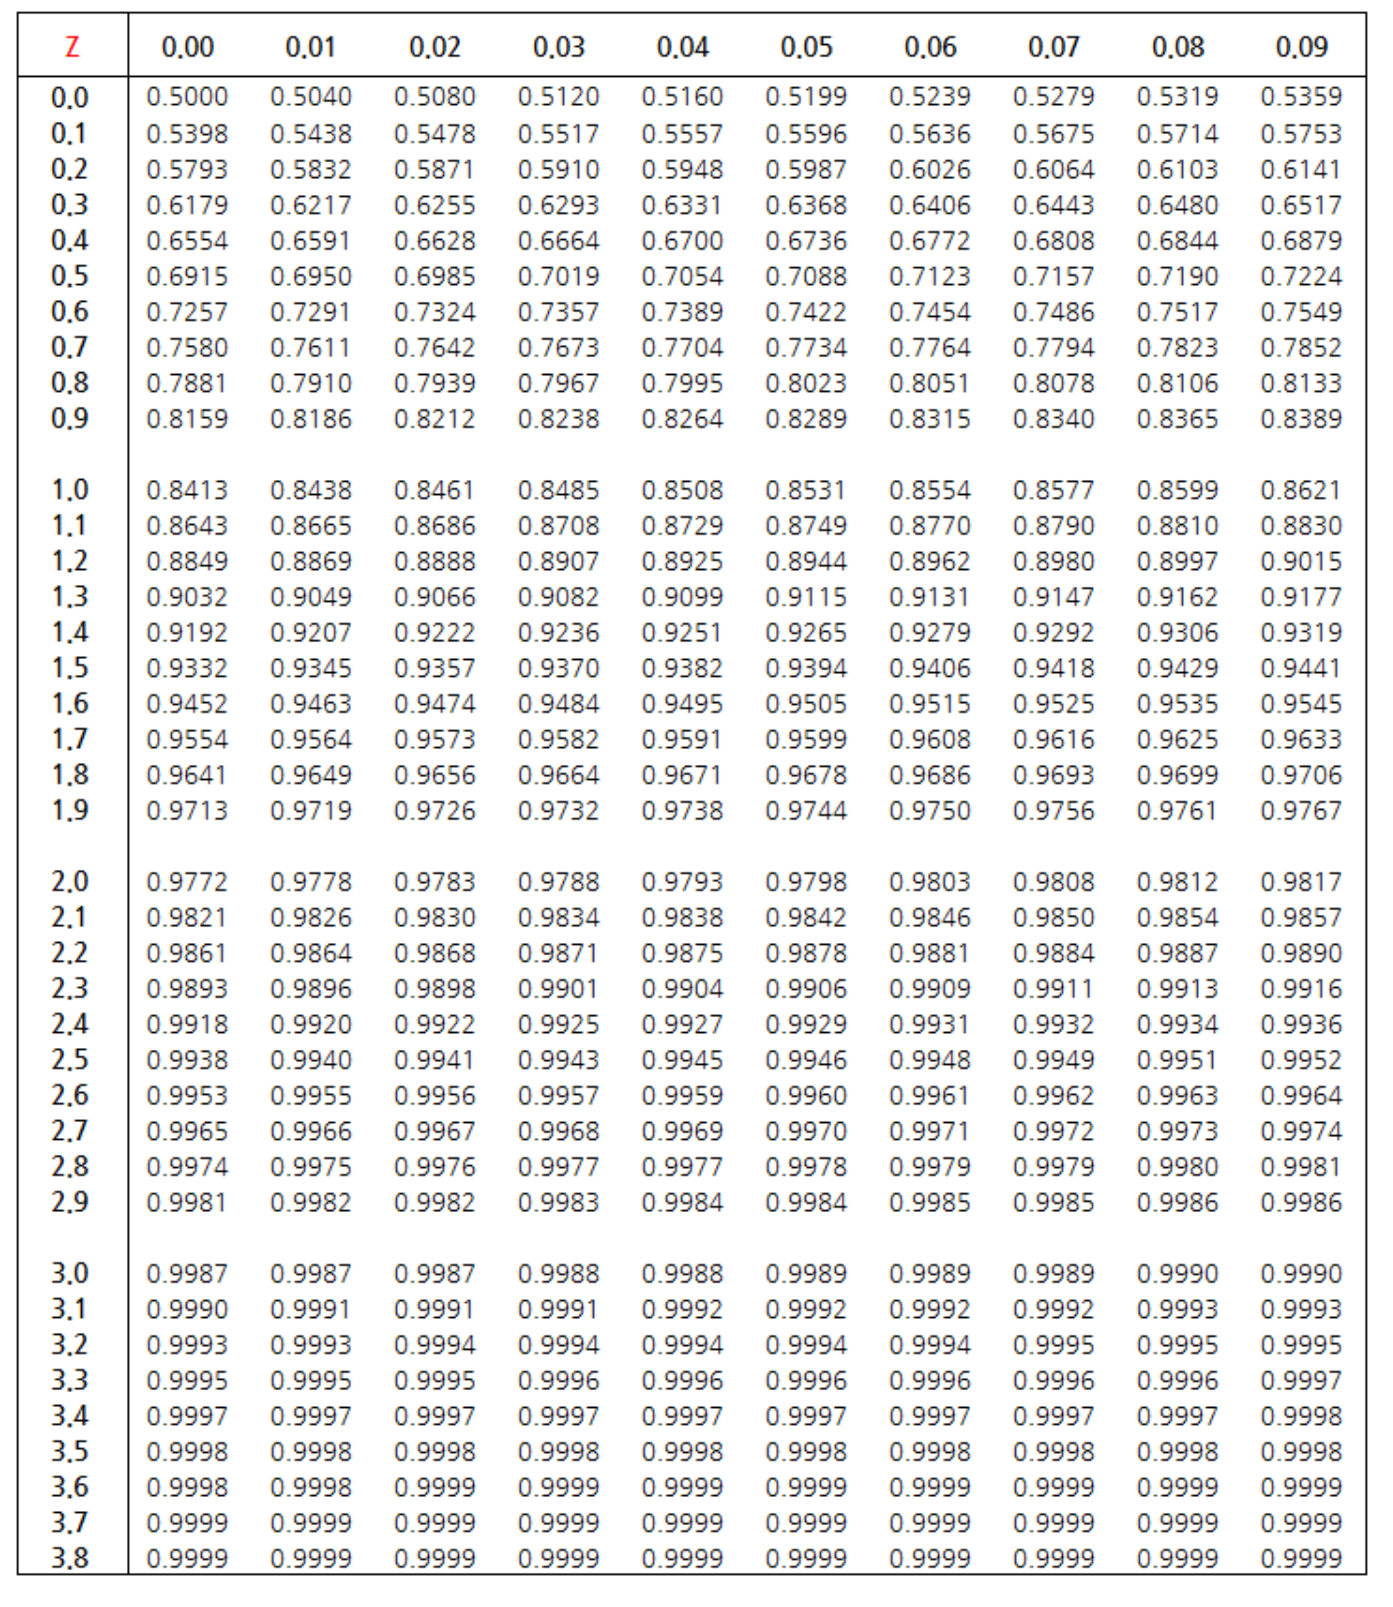

In [89]:
Image('data3/normal.png')

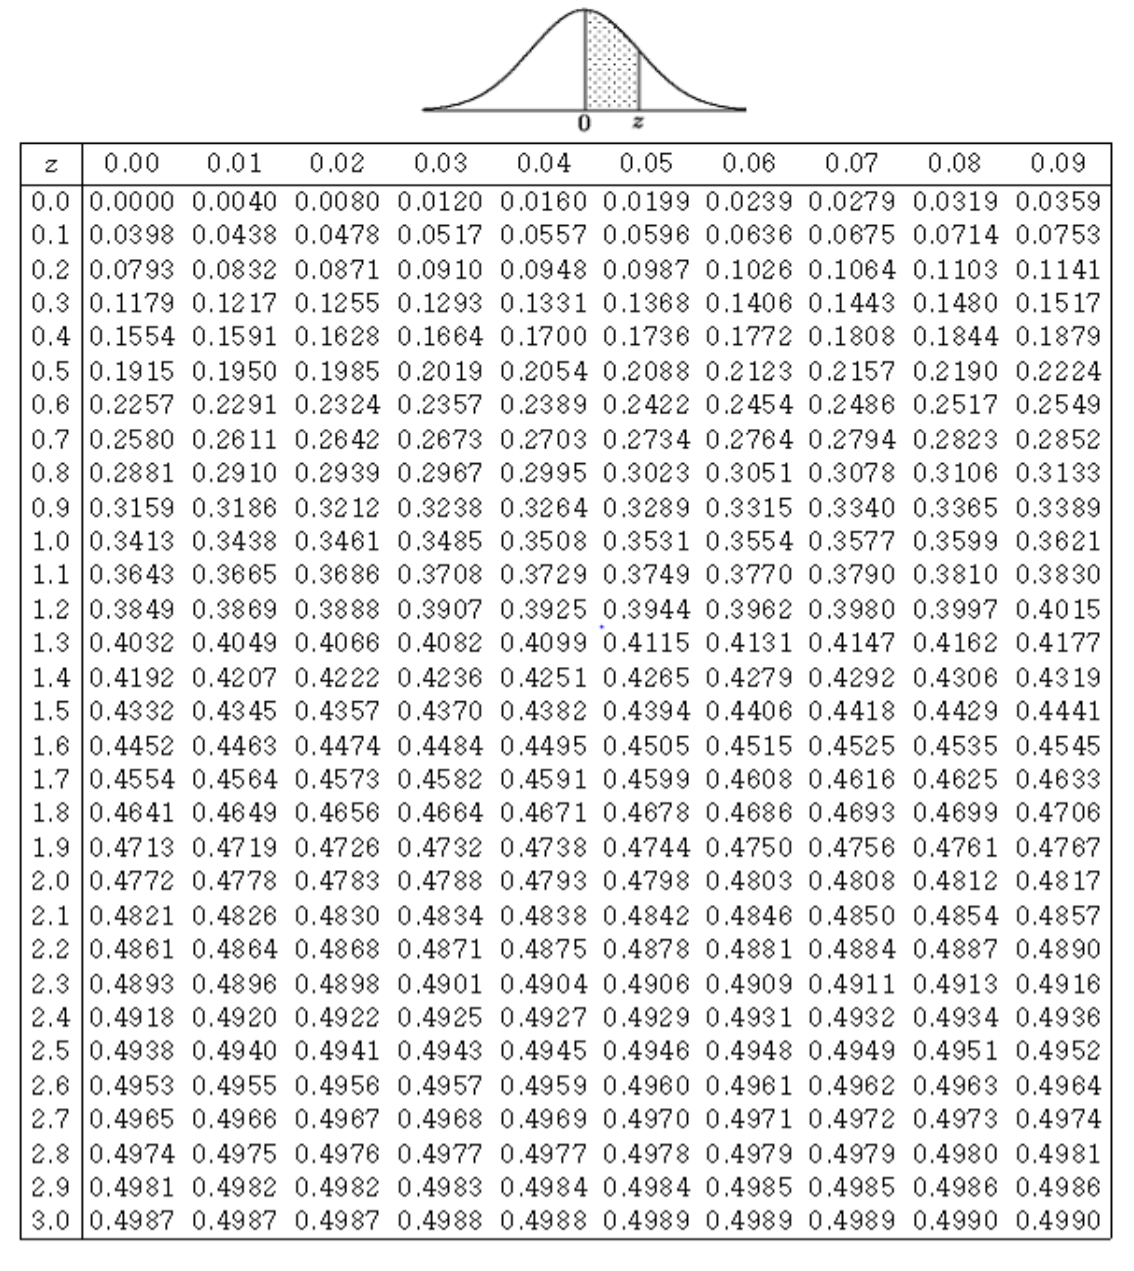

In [90]:
Image('data3/normal1.png')

### 통계적 가설 검정(Statistical hypothesis test)

$H_0$ (귀무가설) : 모집단에 대한 기존의 생각(입장)

$H_1$ (대립가설) : 귀무가설과는 다른 새로운 생각(입장)

#### Z Test

* 모집단의 정보를 알고 있어야 한다.
- $H_0$: $ \mu = \mu_0 $
- $H_1$: $ \mu \gt \mu_0 $  (One-sided test)
- $H_1$: $ \mu < \mu_0 $    (One-sided test)
- $H_1$: $ \mu \ne \mu_0 $  (Two-sided test)


- Rejection region
- p-value

#### 6. 다음 가설을 검정하시오.
- $H_0$: $ \mu =  641 $
- $H_1$: $ \mu >  641$  (One-sided test)

In [176]:
rv    = stats.norm( 0, 1 )
mu    = 600
n     = 20
xbar  = 641
sigma = 100
p     = 1 - rv.cdf( (math.sqrt( n )*( xbar - mu ) / sigma) )
alpha = 0.05
if p < alpha:
    print('reject H0')
else:
    print('not reject H0')
p

reject H0


0.033358497950542465

#### 7. 벤처기업 경영자의 혈압이 일반인보다 높은지 아닌지를 검정하시오.
- $H_0$: $ \mu =  115 $
- $H_1$: $ \mu \ne  115$  (Two-sided test)

In [184]:
rv    = stats.norm( 0, 1 )
mu    = 115
n     = 20
xbar  = 135
sigma = 25
p     = 2*( 1 - rv.cdf( (math.sqrt( n )*( xbar - mu ) / sigma) ) )
alpha = 0.05
if p < alpha:
    print('reject H0')
else:
    print('not reject H0')
p

reject H0


0.00034661935113455833

### t 분포(t Distribution)

$$
\begin{align}
 t= \dfrac{ \bar{x} - \mu }{{ s }  / { \sqrt{n} } } 
\end{align}
$$

#### t-test

- One sample t-test : 한 개의 모집단을 이루고 있는 양적 자료의 모평균에 대한 가설 검정

In [165]:
np.random.seed(1)
height = 180 + np.random.normal( 0, 5, 20 )

In [166]:
height

array([188.12172682, 176.94121793, 177.35914124, 174.63515689,
       184.32703815, 168.49230652, 188.72405882, 176.1939655 ,
       181.59519548, 178.75314812, 187.31053969, 169.69929645,
       178.38791398, 178.07972823, 185.66884721, 174.50054366,
       179.13785896, 175.61070791, 180.21106873, 182.91407607])

In [181]:
stats.ttest_1samp( height, 175,).pvalue

0.00277711459981648

- (Independent) Two sample t-test : 두개의 독립적인 모집단에 대한 평균이 통계적으로 유의한 차이가 있는지에 대한 가설 검정

Case
- 등분산( Homogeneity )
- 이분산( Heteroskedasticity )

In [173]:
np.random.seed(1)
sam1 = 170 + np.random.normal( 0, 5, 20 )
sam2 = 175 + np.random.normal( 0, 10, 20 )

- Assume Homogeneity

In [186]:
states.ttest_ind( sam1, sam2 ).pvalue

0.025249639899591222

- Assume Heteroskedasticity

In [189]:
states.ttest_ind( sam1, sam2, equal_var=False ).pvalue

0.025992343643634945

- Paired t-test : 두 모집단으로부터 표본을 각각 추출할 때 표본 각각의 인자가 서로 대응되는 표본 ex) 사전(pre) 사후(post) 비교시

In [191]:
np.random.seed(1)
before = [ 60 + np.random.normal( 0, 5 ) for _ in range(20)     ]
after  = [  w * np.random.normal( 0.99, 0.02 ) for w in before ]

In [196]:
stats.ttest_rel( before, after ).pvalue

0.008871163766572827